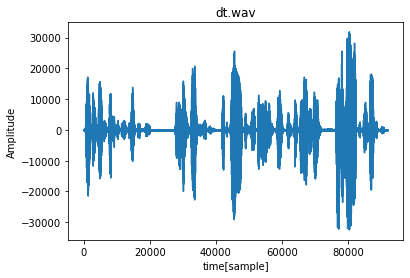

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

rate, data = wavfile.read('./오디오샘플/dt.wav')
plt.plot(data), plt.title('dt.wav'), plt.xlabel('time[sample]'), plt.ylabel('Amplitude')
plt.show()

# wav file write
wavfile.write('test.wav', rate, data)

### <실습 1-1>

1.'dt.wav’파일을 읽어 들이시오. 
>(a) 읽은 데이터를 대상으로 그 크기를 2배로 하여 ‘dt_amplify2.wav’라는 파일로 저장
하시오.  
>(b) 원본 데이터와 크기를 2배 크게 만든 데이터를 `subplot()` 함수를 이용하여 같이 화
면에 display하고, 그 크기 변화를 확인하시오.

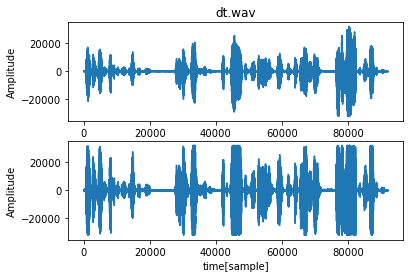

In [21]:
data_amplify = data * 2
wavfile.write('dt_amplify2.wav',rate, data)

plt.subplot(2,1,1),plt.plot(data), plt.title('dt.wav'),plt.ylabel('Amplitude')
plt.subplot(2,1,2),plt.plot(data_amplify), plt.xlabel('time[sample]'),plt.ylabel('Amplitude')
plt.show()



### < 실습문제 2-1>
>1. ‘dt.wav’파일을 읽어 소리를 확인하시오.   
>2. dt_amplify2.wav’을 읽어 소리를 확인하시오. 원본 데이터와 크기를 2배 크게 만든 데이터의 소리를 비교해서 들어보고 차이를 설명하시오. 그리고 그 원인을 설명하시오.

In [25]:
#3만 넘어서 오버플로우 발생. 

Play_sound('dt_amplify2.wav') 
#소리가 커지고 치직 거림.

## 23.09.11 월

In [15]:
import pygame
import pygame.mixer
from time import sleep

def Play_sound(filename):
    pygame.mixer.init()
    sound = pygame.mixer.Sound(filename)
    tmp = sound.play()
    while tmp.get_busy():
        pygame.time.delay(1)
    
Play_sound('./오디오샘플/dt.wav')

### < 실습 2-2 >
> 1. "Kalimba_mono.wav”파일을 읽고 소리를 들어보시오.
> 2.“Kalimba_stereo.wav”파일을 읽고 소리를 들어보시오. 
> 3. 모노와 스테레오 파일을 열어서 소리를 확인 하고, 데이터 구조를 살펴보시오. 스테레
오의 경우 양쪽 채널을 데이터를 그림으로 그려보시오.

In [20]:
rate1, data1 = wavfile.read('./오디오샘플/Kalimba_mono.wav')
rate2, data2 = wavfile.read('./오디오샘플/Kalimba_stereo.wav')

In [10]:
Play_sound('./오디오샘플/Kalimba_mono.wav')
Play_sound('./오디오샘플/Kalimba_stereo.wav') #left, right 따로 있는거.

In [21]:
print(data1.shape) # 채널1개
print(data2.shape) # 채널2개

(3101929,)
(3101929, 2)


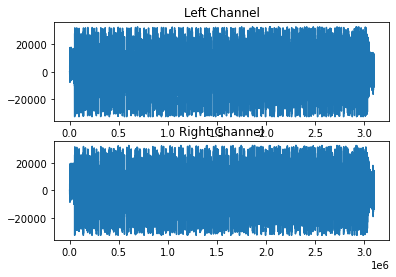

In [22]:
plt.subplot(211), plt.plot(data2[:,0]), plt.title('Left Channel')
plt.subplot(212), plt.plot(data2[:,1]), plt.title('Right Channel')
plt.show()

In [23]:
rate, data = wavfile.read('./오디오샘플/dt.wav')

In [24]:
print(rate) # fs = 11.025 KHz

11025


In [27]:
rate = 22050
wavfile.write('dt_22050.wav', rate, data)
Play_sound('dt_22050.wav') # 빨리감기 됨.
#1초에 11025만큼 소리가 나야하는뎅 22050만 플레이돼서 빨라짐여

In [28]:
rate = 8000
wavfile.write('dt_8000.wav', rate, data)
Play_sound('dt_8000.wav') # 느려짐.

### < 실습 2-3 >
> 1.“autumn.wav”파일을 읽고 소리를 들어보시오.  
> 2. 읽어들인 “autumn.wav”의 sampling rate를 print문으로 출력해보시오.   
> 3. sampling rate를 22.05 kHz 변화시키고 파일을 “autumn_22050.wav”로 저장하고, 다시 불러들여 소리를 들어보시오.   
> 4. sampling rate를 48, 96 kHz로 각각 변화시키고 파일을 “autumn_48000.wav”,“autumn_96000.wav”로 각각 저장하고, 다시 불러들여 소리를 들어보시오. 

In [30]:
rate, data = wavfile.read('./오디오샘플/autumn.wav')
print(rate)

44100


In [35]:
rate = 22050
wavfile.write('autumn_22050.wav', rate, data)
Play_sound('autumn_22050.wav')

In [36]:
rate = 48000
wavfile.write('autumn_48000.wav', rate, data)
Play_sound('autumn_48000.wav')

In [37]:
rate = 96000
wavfile.write('autumn_96000.wav', rate, data)
Play_sound('autumn_96000.wav')

5.“autumn.wav”파일의 오디오 내용을 거꾸로 만들고, subplot()함수를 사용하여 원본과 같이 그림으로 출력하시오. 그리고, 그 소리를 들어보시오

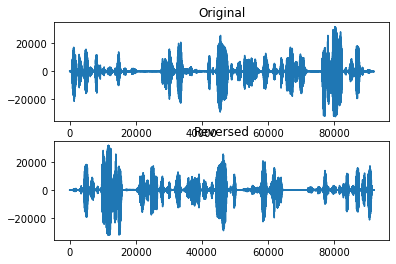

In [41]:
rate, data = wavfile.read('./오디오샘플/dt.wav')
data_reverse = data[::-1]
wavfile.write('dt_reverse.wav', rate, data_reverse)

plt.subplot(211), plt.plot(data), plt.title('Original')
plt.subplot(212), plt.plot(data_reverse), plt.title('Reversed')
plt.show()

Play_sound('dt_reverse.wav')

6.“autumn.wav”파일을 읽어서 한 샘플씩 건너띄며 샘플을 저장하여 audio_down이라는 
배열에 저장하시오.
audio_down배열을 원래의 sampling rate를 사용하여“test_down.wav”로 저장하고 다시 불러들여 소리를 들어보시오. 
결과 소리가 이상하게 들렸다면 그 이유를 생각해보시오.변화된 내용에 대해 서로 토론하며 의견을 교환하시
오.

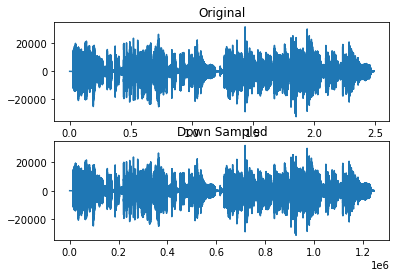

In [43]:
rate, data = wavfile.read('./오디오샘플/autumn.wav')
data_down = data[::2]
wavfile.write('autumn_down.wav', rate, data_down)

plt.subplot(211), plt.plot(data), plt.title('Original')
plt.subplot(212), plt.plot(data_down), plt.title('Down Sampled')
plt.show()

Play_sound('autumn_down.wav')

--> 샘플링 rate를 높이는거와 같은 결과가 나온다.  
data[::2]  
중간에 하나씩 제거하니까 플레이시키는 길이가 줄어진교

<길이를 늘리려면?>  
중간에 0을 하나씩 넣어준다. 대신 끊겨서 이상한 소리가 들림용